# Interactive single compartment HH example

In [2]:
!pip install pyneuroml
!pip install libneuroml
import math
from neuroml import NeuroMLDocument
from neuroml import Cell
from neuroml import IonChannelHH
from neuroml import GateHHRates
from neuroml import BiophysicalProperties
from neuroml import MembraneProperties
from neuroml import ChannelDensity
from neuroml import HHRate
from neuroml import SpikeThresh
from neuroml import SpecificCapacitance
from neuroml import InitMembPotential
from neuroml import IntracellularProperties
from neuroml import IncludeType
from neuroml import Resistivity
from neuroml import Morphology, Segment, Point3DWithDiam
from neuroml import Network, Population
from neuroml import PulseGenerator, ExplicitInput
import numpy as np
from pyneuroml import pynml
from pyneuroml.lems import LEMSSimulation

     |████████████████████████████████| 27.7 MB 103 kB/s 
     |████████████████████████████████| 63 kB 2.1 MB/s 
     |████████████████████████████████| 95 kB 3.9 MB/s 
     |████████████████████████████████| 221 kB 55.7 MB/s 
     |████████████████████████████████| 78 kB 6.5 MB/s 
  Created wheel for airspeed: filename=airspeed-0.5.17-py3-none-any.whl size=11505 sha256=e45e5851773420a29ee7fa590ebc9861c5ff559cc99365f606dc484c60b85eaf
  Stored in directory: /root/.cache/pip/wheels/34/b2/2a/f1991182a1b88a52e023820f90d4f673e76022f0f9eb2c851b
  Created wheel for typing: filename=typing-3.7.4.3-py3-none-any.whl size=26324 sha256=2fc1b5658a3ff87b28e1c62398dda6357b2b0be762a059d34e998cdff2c34c7f
  Stored in directory: /root/.cache/pip/wheels/35/f3/15/01aa6571f0a72ee6ae7b827c1491c37a1f72d686fd22b43b0e
Successfully built airspeed typing


## Cell 1 

In [3]:
# Simulation bits
sim_id = "hn1"
simulation = LEMSSimulation(sim_id=sim_id, duration=1000, dt=0.01, simulation_seed=123)

# Include the NeuroML model file
simulation.include_neuroml2_file("network.iso.cell1.nml")

# Assign target for the simulation
simulation.assign_simulation_target("net_1")

# Recording information from the simulation
simulation.create_output_file(id="output0", file_name=sim_id + ".dat")
simulation.add_column_to_output_file("output0", column_id="v1L", quantity="hn1L_pop[0]/v")
simulation.add_column_to_output_file("output0", column_id="v1L", quantity="hn1L_pop[0]/bio_phys_HN1/membraneProperties/na_chan_den/iDensity")
simulation.add_column_to_output_file("output0", column_id="v1L", quantity="hn1L_pop[0]/bio_phys_HN1/membraneProperties/k1_chan_den/iDensity")
simulation.add_column_to_output_file("output0", column_id="v1L", quantity="hn1L_pop[0]/bio_phys_HN1/membraneProperties/k2_chan_den/iDensity")

# Save LEMS simulation to file
sim_file = simulation.save_to_file()

# Run the simulation using the default jNeuroML simulator
pynml.run_lems_with_jneuroml(sim_file, max_memory="2G", nogui=True, plot=False)

pyNeuroML >>> Written LEMS Simulation hn1 to file: LEMS_hn1.xml


True

pyNeuroML >>> Generating plot: Membrane potential
pyNeuroML >>> Saved image to hn1-v.png of plot: Membrane potential
pyNeuroML >>> Generating plot: current density
pyNeuroML >>> Saved image to hn1-iden.png of plot: current density


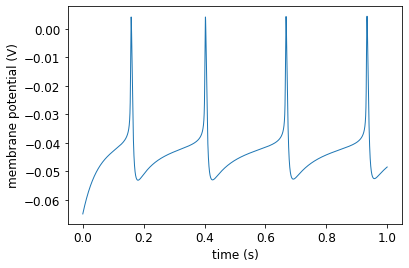

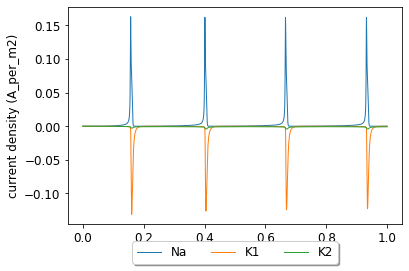

In [6]:
# Plot the data
data_array = np.loadtxt(sim_id + ".dat")

pynml.generate_plot([data_array[:, 0]], [data_array[:, 1]], "Membrane potential",
                    show_plot_already=False, save_figure_to=sim_id + "-v.png", 
                    xaxis="time (s)", yaxis="membrane potential (V)")

pynml.generate_plot([data_array[:, 0], data_array[:, 0], data_array[:, 0]], 
                    [data_array[:, 2], data_array[:, 3], data_array[:, 4]],
                    "current density", labels=["Na", "K1", "K2"], 
                    show_plot_already=False, save_figure_to=sim_id + "-iden.png", 
                    xaxis="time (s)", yaxis="current density (A_per_m2)")

## Cell 2

In [ ]:
# Simulation bits
sim_id = "hn2"
simulation = LEMSSimulation(sim_id=sim_id, duration=1000, dt=0.01, simulation_seed=123)

# Include the NeuroML model file
simulation.include_neuroml2_file("network.iso.cell2.nml")

# Assign target for the simulation
simulation.assign_simulation_target("net_1")

# Recording information from the simulation
simulation.create_output_file(id="output0", file_name=sim_id + ".dat")
simulation.add_column_to_output_file("output0", column_id="v1L", quantity="hn2L_pop[0]/v")
simulation.add_column_to_output_file("output0", column_id="v1L", quantity="hn2L_pop[0]/bio_phys_HN2/membraneProperties/na_chan_den/iDensity")
simulation.add_column_to_output_file("output0", column_id="v1L", quantity="hn2L_pop[0]/bio_phys_HN2/membraneProperties/k1_chan_den/iDensity")
simulation.add_column_to_output_file("output0", column_id="v1L", quantity="hn2L_pop[0]/bio_phys_HN2/membraneProperties/k2_chan_den/iDensity")

# Save LEMS simulation to file
sim_file = simulation.save_to_file()

# Run the simulation using the default jNeuroML simulator
pynml.run_lems_with_jneuroml(sim_file, max_memory="2G", nogui=True, plot=False)

pyNeuroML >>> Generating plot: Membrane potential
pyNeuroML >>> Saved image to hn1-v.png of plot: Membrane potential
pyNeuroML >>> Generating plot: current density
pyNeuroML >>> Saved image to hn1-iden.png of plot: current density
pyNeuroML >>> Generating plot: K2 Zoom In


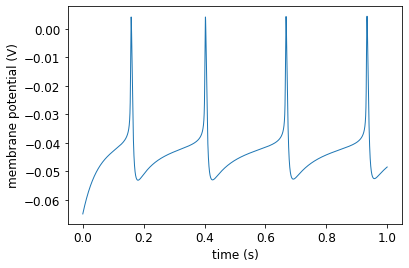

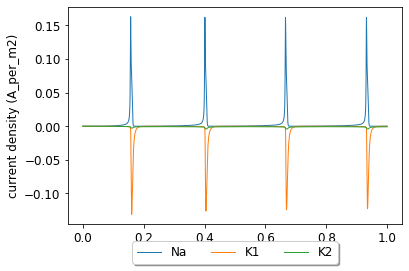

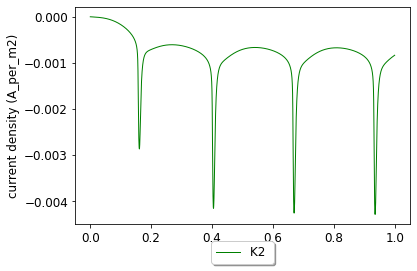

In [13]:
# Plot the data
data_array = np.loadtxt(sim_id + ".dat")

pynml.generate_plot([data_array[:, 0]], [data_array[:, 1]], "Membrane potential",
                    show_plot_already=False, save_figure_to=sim_id + "-v.png", 
                    xaxis="time (s)", yaxis="membrane potential (V)")

pynml.generate_plot([data_array[:, 0], data_array[:, 0], data_array[:, 0]], 
                    [data_array[:, 2], data_array[:, 3], data_array[:, 4]], 
                    "current density", labels=["Na", "K1", "K2"], 
                    show_plot_already=False, save_figure_to=sim_id + "-iden.png", 
                    xaxis="time (s)", yaxis="current density (A_per_m2)")

pynml.generate_plot([data_array[:, 0]], [data_array[:, 4]], "K2 Zoom In",
                    labels=["K2 "], show_plot_already=False, colors="green",
                    xaxis="time (s)", yaxis="current density (A_per_m2)")

## Cell 34

In [16]:
# Simulation bits
sim_id = "hn34"
simulation = LEMSSimulation(sim_id=sim_id, duration=1000, dt=0.01, simulation_seed=123)

# Include the NeuroML model file
simulation.include_neuroml2_file("network.iso.cell34.nml")

# Assign target for the simulation
simulation.assign_simulation_target("net_1")

# Recording information from the simulation
simulation.create_output_file(id="output0", file_name=sim_id + ".dat")
simulation.add_column_to_output_file("output0", column_id="v1L", quantity="hn3L_pop[0]/v")
simulation.add_column_to_output_file("output0", column_id="v1L", quantity="hn3L_pop[0]/bio_phys_HN34/membraneProperties/na_chan_den/iDensity")
simulation.add_column_to_output_file("output0", column_id="v1L", quantity="hn3L_pop[0]/bio_phys_HN34/membraneProperties/k1_chan_den/iDensity")
simulation.add_column_to_output_file("output0", column_id="v1L", quantity="hn3L_pop[0]/bio_phys_HN34/membraneProperties/k2_chan_den/iDensity")
simulation.add_column_to_output_file("output0", column_id="v1L", quantity="hn3L_pop[0]/bio_phys_HN34/membraneProperties/caf_chan_den/iDensity")
simulation.add_column_to_output_file("output0", column_id="v1L", quantity="hn3L_pop[0]/bio_phys_HN34/membraneProperties/cas_chan_den/iDensity")
simulation.add_column_to_output_file("output0", column_id="v1L", quantity="hn3L_pop[0]/bio_phys_HN34/membraneProperties/h_chan_den/iDensity")
simulation.add_column_to_output_file("output0", column_id="v1L", quantity="hn3L_pop[0]/bio_phys_HN34/membraneProperties/p_chan_den/iDensity")


# Save LEMS simulation to file
sim_file = simulation.save_to_file()

# Run the simulation using the default jNeuroML simulator
pynml.run_lems_with_jneuroml(sim_file, max_memory="2G", nogui=True, plot=False)

pyNeuroML >>> Written LEMS Simulation hn34 to file: LEMS_hn34.xml


True

pyNeuroML >>> Generating plot: Membrane potential
pyNeuroML >>> Saved image to hn34-v.png of plot: Membrane potential
pyNeuroML >>> Generating plot: current density
pyNeuroML >>> Saved image to hn34-iden.png of plot: current density
pyNeuroML >>> Generating plot: current density
pyNeuroML >>> Saved image to hn34-iden.png of plot: current density
pyNeuroML >>> Generating plot: current density
pyNeuroML >>> Saved image to hn34-iden.png of plot: current density


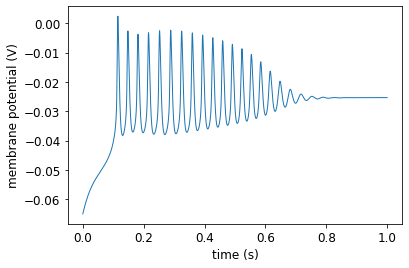

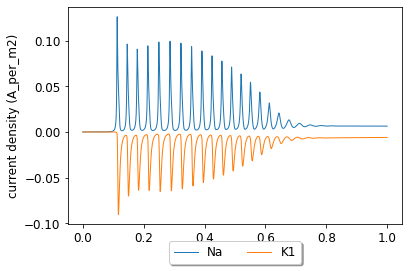

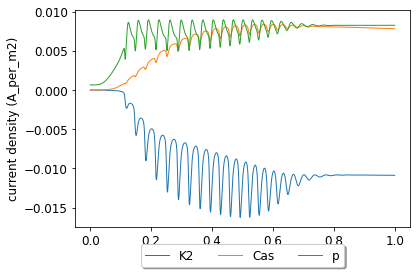

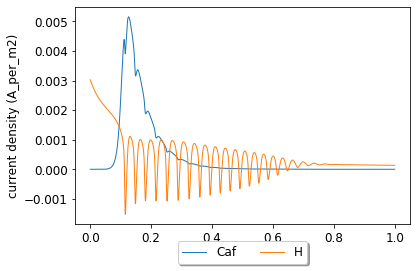

In [22]:
# Plot the data
data_array = np.loadtxt(sim_id + ".dat")

pynml.generate_plot([data_array[:, 0]], [data_array[:, 1]], "Membrane potential",
                    show_plot_already=False, save_figure_to=sim_id + "-v.png", 
                    xaxis="time (s)", yaxis="membrane potential (V)")


#Current Den 
#large
pynml.generate_plot([data_array[:, 0], data_array[:, 0]], 
                    [data_array[:, 2], data_array[:, 3]], 
                    "current density", labels=["Na", "K1"],
                    show_plot_already=False, save_figure_to=sim_id + "-iden.png", 
                    xaxis="time (s)", yaxis="current density (A_per_m2)")

#small
pynml.generate_plot([data_array[:, 0], data_array[:, 0], data_array[:, 0]], 
                    [data_array[:, 4], data_array[:, 6], data_array[:, 8]], 
                    "current density", labels=["K2", "Cas", "p"], 
                    show_plot_already=False, save_figure_to=sim_id + "-iden.png", 
                    xaxis="time (s)", yaxis="current density (A_per_m2)")

#even smaller
pynml.generate_plot([data_array[:, 0], data_array[:, 0]], 
                    [data_array[:, 5], data_array[:, 7]], 
                    "current density", labels=["Caf", "H"], 
                    show_plot_already=False, save_figure_to=sim_id + "-iden.png", 
                    xaxis="time (s)", yaxis="current density (A_per_m2)")